

# Project: Investigate a Dataset No-show appointments



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil.
  It focused on whether or not patients show up for their appointment, 
  so I will use it to predict whether a new patient will show up or not by answering **these questions**: 
>
>
1-Does certain range of age have more chance to doesn’t show up? 
>
2-Do patient that received SMS have higher chance to show up? 
> 
3-what Scheduled months from certain range of age tend to not show up? 

In [1]:
# Importing libraries that I will use in this project: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# to show the graphs : 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load my data then I will clean it and make sure its ready for explore.

### General Properties

In [2]:
# Load the data and print out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016-orgianl.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# see general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


####  - I can see that there is no missing values

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### - here we have issue cause the min age is -1 which is invalid value

In [5]:
# check if there are null valuse in the data

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning :

> things I will do in this phase
-	Check if there is any duplicated value 
-	Fix invalid values in age 
-	Check if there is any invalid value in SMS_received
-   extract months from ScheduledDay then rename the  column
-	Drop unrelated columns 


In [6]:
# check if there are duplicated data:

df.duplicated().sum()

0

In [7]:
# there are no missing values in the info() but age values have invalid values that need to be checked :

df[df['Age'] <= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184430e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366230e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885170e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718820e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647130e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473950e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577530e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321850e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


#### - I discovered that we have 3540 invalid ages ( 0 and -1 ) , I will reblace them with the median of all ages. 

In [8]:
# this function i will take each age and check if its invalid then it will replace it with the median otherwise 
# it will return the same age: 

def replaceAge(i):
    if i < 1:
        return df['Age'].median()
    else:
        return i
    
# here will pass the whole column to the function:
df['Age'] = df['Age'].apply(lambda x: replaceAge(x))

In [10]:
# now i will check again to make sure 
df[df['Age'] <= 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### - it seems like we fix this issue

In [11]:
# know I will check if the SMS_received contain valid values 
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

#### - it look fine , now I will extract the month from ScheduledDay 

In [12]:
# here i will go and pass every ScheduledDay to split function where it will return the second index witch is the month: 

df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.split("-")[1])
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,04,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,04,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,04,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,04,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,04,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


#### - now I need to convert the datatype since its string and i want it as int and i will rename the column since we have only the months:

In [13]:
# convert the ScheduledDay to intger : 
df['ScheduledDay'] = df['ScheduledDay'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  int32  
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 11.4+ MB


In [14]:
# rename the cloumn to ScheduledMonth

df.rename(columns={'ScheduledDay' : 'ScheduledMonth'} , inplace = True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledMonth,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,4,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No


#### - now i will Drop unrelated columns 

In [15]:
# i will work only with these columns (ScheduledMonth , Age , SMS_received , No-show)

df.drop(['PatientId','AppointmentID', 'Gender'  , 'AppointmentDay' ,'Neighbourhood', 'Scholarship' , 'Hipertension' , 'Diabetes' ,
                      'Alcoholism','Handcap'] , axis = 1 , inplace=True)
df.head(5)

,ScheduledMonth,Age,SMS_received,No-show
0,4,62.0,0,No
1,4,56.0,0,No
2,4,62.0,0,No
3,4,8.0,0,No
4,4,56.0,0,No


### -the data now are ready-



<a id='eda'></a>
## Exploratory Data Analysis

> now I will try to visualize the questions by representing them in different charts:

### Research Question 1 : Does certain range of age have more chance to doesn’t show up?

#### - in order to answer this question I will find the distrubtion of Ages for each one : 

In [16]:
# sperate the ones who showed up and those who didt

yes_showup = df[df['No-show'] == 'No']
no_showup =  df[df['No-show'] == 'Yes']

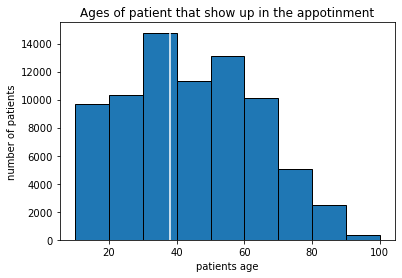

In [17]:
# now I will visulaize the distrubation of ages for who showed up : 


# here I Will create arange to visulaize better 
age_range = [10,20,30,40,50,60,70,80,90,100]

# here I will creat the chart and style it with bins and edge color
plt.hist(yes_showup['Age'] , bins = age_range , edgecolor = 'black' )

# here i will put some char informations to be easy to read 
plt.title('Ages of patient that show up in the appotinment')
plt.xlabel('patients age')
plt.ylabel('number of patients')

# here i will find the median to compare it to the other graph 
plt.axvline(yes_showup['Age'].median() , color = 'white')

#### - there are nothing unordinary with who show up in this distribution also the median is around 40 lets see the other graph to compare

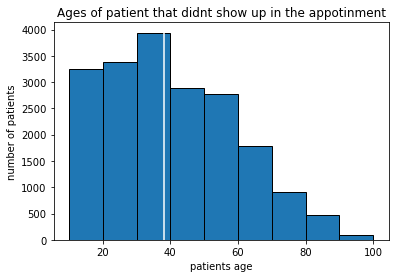

In [18]:
# now I will visulaize the distrubation of ages for who didnt show up : 

# here i creat the chart and style it with bins and edge color
plt.hist(no_showup['Age'] , bins = age_range , edgecolor = 'black' )

# here i will put some char informations to be easy to read 
plt.title('Ages of patient that didnt show up in the appotinment')
plt.xlabel('patients age')
plt.ylabel('number of patients')

# here i will find the median to compare it to the other graph 
plt.axvline(yes_showup['Age'].median() , color = 'white')

####  - there are no clear relations between the age and showing up to an appointment specially they have almost the same median and both of the graphs have same pattern.

### Research Question 2  : Do patient that received SMS have higher chance to show up?

#### in order to answer this question I will find the percentage of each cases and represent in pie chart:

In [19]:
#here i will use groupby to extract each case in these two variables :

rs = df.groupby(['No-show','SMS_received'])['No-show'].count()
rs

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: No-show, dtype: int64

Text(0.5, 1.0, 'showing up in the appotinment')

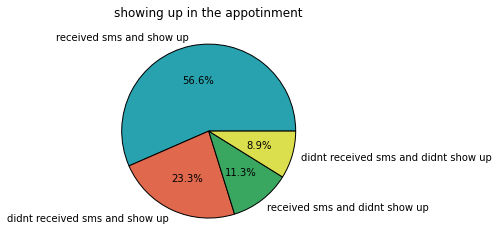

In [20]:
# here i will creat the pie chart and style it

labels = ['received sms and show up','didnt received sms and show up' , 'received sms and didnt show up' , 'didnt received sms and didnt show up']
colors = ['#28A2AE' , '#DF684D' , '#3AA761' , '#DCDF4D']
plt.pie(rs , labels = labels , colors = colors , wedgeprops={'edgecolor' : 'black'} , autopct = '%1.1f%%')
plt.title("showing up in the appotinment")

#### - it seems that patient who received sms has way better chance to show up in fact if we ignore the other factor which plays huge role we could say that receiving sms will increase the chance of showing up by 33.3% however sms will definitely increase that chance of showing up but we need to consider every other factor to provide specific number.

### Research Question 3  : what Scheduled months from certain range of age tend to not show up? 

#### in order to answer this question will use Age , Scheduled month and no-show in scatter to see how all these three variable will be:

#### i will represent the no-show as color in the scatter so i want to creat list that contain no-show as int: 

In [21]:
# this functions will take a string and will return 0 if patient show up and 1 if didnt
def convert(i):
    if i == 'No':
        return 0
    else:
        return 1
    
# this list that will contain no-show as integer
colorRange = df['No-show'].apply(lambda x: convert(x))

In [22]:
colorRange.value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

#### - know i will creat the scatter

Text(10, 115, 'blue: show up \ngreen: didnt show up')

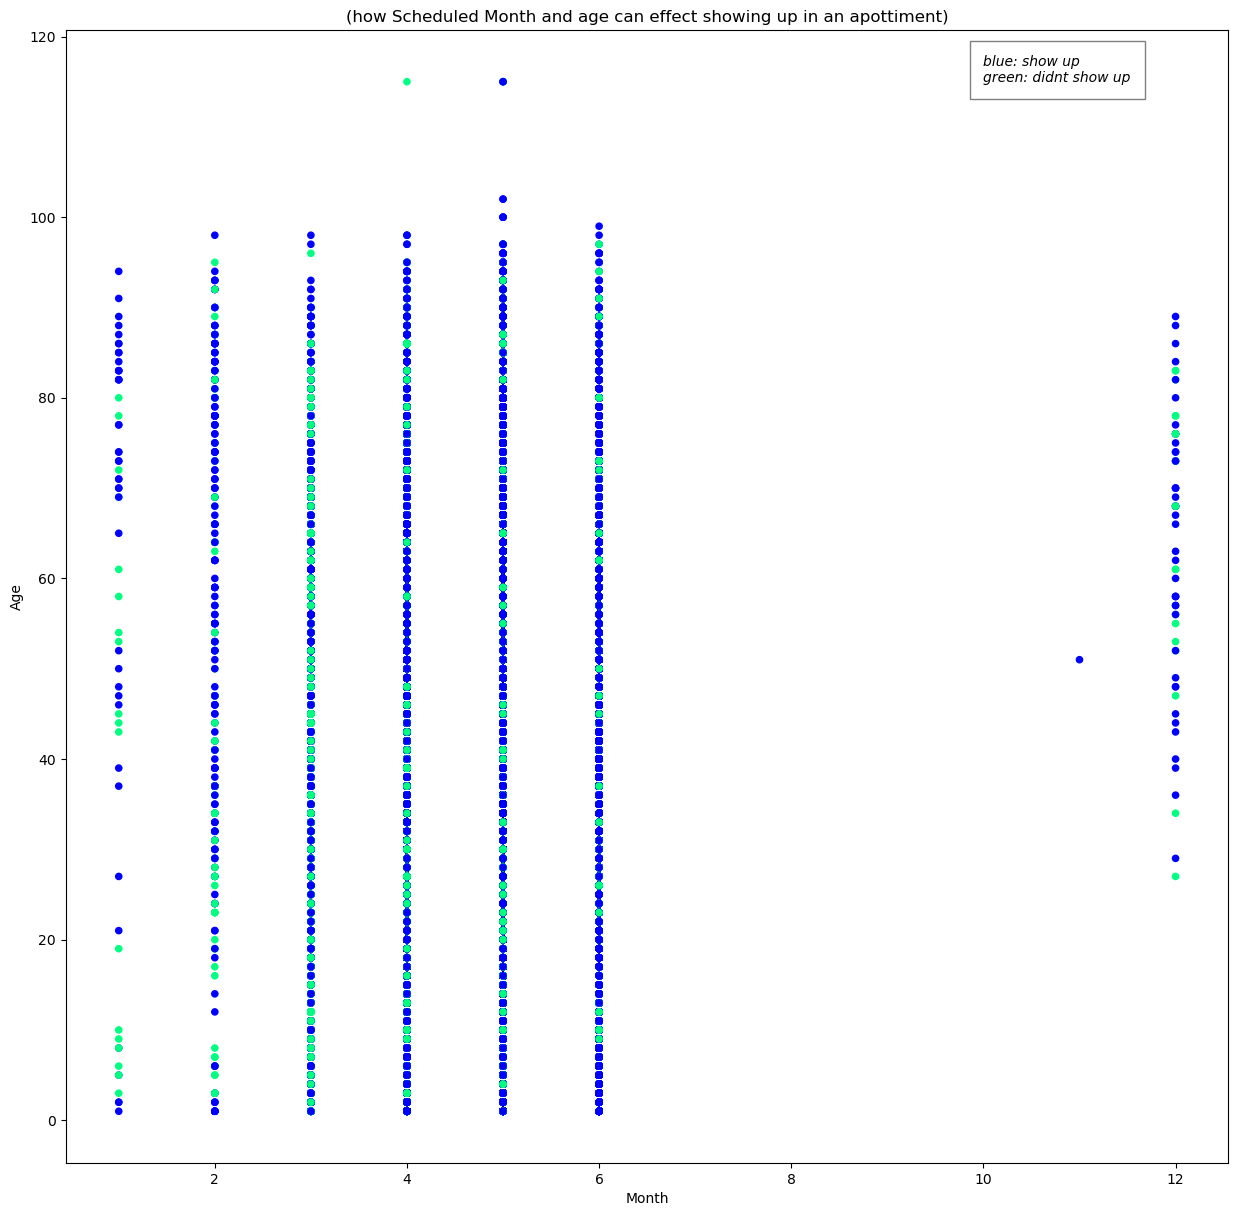

In [23]:
# creat scatter and style it :

plt.figure(figsize=(15, 15), dpi=100)
plt.scatter(df['ScheduledMonth'] ,df['Age'] , s=20 , c= colorRange , cmap= 'winter' );
plt.title('(how Scheduled Month and age can effect showing up in an apottiment)')
plt.xlabel('Month')
plt.ylabel('Age')
plt.text(10, 115, 'blue: show up \ngreen: didnt show up', style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

#### it seems that age don’t play factor on showing up or not however I can see that there are some months that patients tend to show up more and other months they don’t : 
> - patients who schedule in June tend to show up. 
> - patients who schedule in January or march have high chance not showing up


<a id='conclusions'></a>
## Conclusions

**my limitations in this project** :
>
  1- I face invalid values in ages however they were very little compared to the data set so I dropped them 
 >
  2- I wasn’t sure about what kind of charts to use in order to visualize and answers the questions
  > 
  3- they data set doesn’t contain numerical values other than age so it was so difficult for me to find correlations since most of the variables are objects 
  
  
> **my observations**: 
>
  1- based on two distributions charts and the same median for each I don’t think there is relation between age and showing up in an appointment. 
  >
  2- patient who received SMS massage have higher chance to show up.
  > 
  3- patient who schedule in June have high chance to show up on the other hand patient who schedule in January or march have good chance to not show up.


### Thank you